# 🔴 Task 20

Topics: Introduction to Keras, Example Projects on Classification and Regression

Resource: https://drive.google.com/file/d/1i9dPxM_1M4HYN5bYxFcuklC1vM0GrOCq/view?usp=share_link

There are sample project with each part/line explanation for your better understanding are provided in the resource. Try to implement them for practice and learn how things are working.

# Keras

In [1]:
# Keras is a high-level API for building deep learning models.
#It has gained favor for its ease of use and syntactic simplicity 
#facilitating fast development. 

# Regression Models with Keras

In [2]:
import pandas as pd
import numpy as np



In [3]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
concrete_data.shape

(1030, 9)

In [5]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

# Split data into predictors and target


In [7]:
##The target variable in this problem is the concrete sample strength.
# Therefore, our predictors will be all the other columns.

In [8]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [9]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [10]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [11]:
#Finally, the last step is to normalize the data by substracting 
# the mean and dividing by the standard deviation.

In [12]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [13]:
n_cols = predictors_norm.shape[1] # number of predictors

# Import Keras



In [14]:
#Keras normally runs on top of a low-level library such as TensorFlow.

In [15]:
import keras

In [16]:
from keras.models import Sequential
from keras.layers import Dense

# Build a Neural Network

In [17]:
#Let's define a function that defines our regression model for us so that
# we can conveniently call it to create our model.

In [18]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and Test the Network

In [19]:
#Let's call the function now to create our model.

In [20]:
# build the model
model = regression_model()

In [21]:
#Next, we will train and test the model at the same time using the fit method.
# We will leave out 30% of
# the data for validation and we will train the model for 100 epochs.

In [22]:
# fit the model
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
23/23 - 1s - loss: 1627.8726 - val_loss: 1120.1107 - 767ms/epoch - 33ms/step
Epoch 2/100
23/23 - 0s - loss: 1479.1064 - val_loss: 969.9448 - 70ms/epoch - 3ms/step
Epoch 3/100
23/23 - 0s - loss: 1225.2478 - val_loss: 748.2031 - 63ms/epoch - 3ms/step
Epoch 4/100
23/23 - 0s - loss: 865.9624 - val_loss: 486.5109 - 65ms/epoch - 3ms/step
Epoch 5/100
23/23 - 0s - loss: 502.7651 - val_loss: 274.6787 - 60ms/epoch - 3ms/step
Epoch 6/100
23/23 - 0s - loss: 284.6664 - val_loss: 188.4079 - 65ms/epoch - 3ms/step
Epoch 7/100
23/23 - 0s - loss: 226.3876 - val_loss: 174.5147 - 77ms/epoch - 3ms/step
Epoch 8/100
23/23 - 0s - loss: 209.5773 - val_loss: 173.0680 - 68ms/epoch - 3ms/step
Epoch 9/100
23/23 - 0s - loss: 196.3659 - val_loss: 171.6255 - 74ms/epoch - 3ms/step
Epoch 10/100
23/23 - 0s - loss: 187.7233 - val_loss: 173.0169 - 70ms/epoch - 3ms/step
Epoch 11/100
23/23 - 0s - loss: 181.4457 - val_loss: 170.9501 - 74ms/epoch - 3ms/step
Epoch 12/100
23/23 - 0s - loss: 175.3989 - val_loss: 168.

Epoch 97/100
23/23 - 0s - loss: 36.8143 - val_loss: 124.4123 - 63ms/epoch - 3ms/step
Epoch 98/100
23/23 - 0s - loss: 35.8545 - val_loss: 139.2623 - 57ms/epoch - 2ms/step
Epoch 99/100
23/23 - 0s - loss: 35.8363 - val_loss: 130.6833 - 57ms/epoch - 2ms/step
Epoch 100/100
23/23 - 0s - loss: 34.8547 - val_loss: 137.1890 - 59ms/epoch - 3ms/step


# Classification Models with Keras

In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
import matplotlib.pyplot as plt

In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

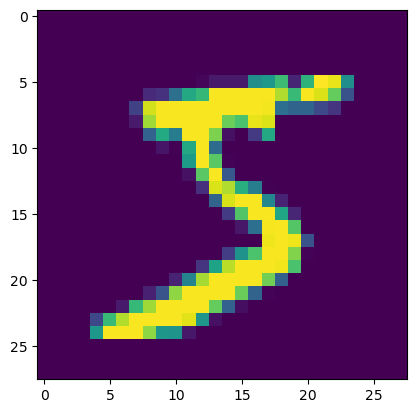

In [5]:
plt.imshow(X_train[0])

In [6]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
#Finally, before we start building our model,
# remember that for classification we need to divide our target 
#variable into categories. We use the to_categorical function 
#from the Keras Utilities package.

In [9]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


# Build a Neural Network

In [10]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and Test the Network

In [4]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

NameError: name 'classification_model' is not defined

In [3]:
model.save('classification_model.h5')    

NameError: name 'model' is not defined